# A2 - Introdução à Ciência de Dados
## Análise Exploratória de Dados em Python

>#### Grupo:
>Amanda de Mendonça Perez - 211708002
>
>Douglas Arthur Almeida Hancock - 211708039
>
>Luigi Von Blücher Mezzogori - 202708901
>
>Pablo

Inicialmente, importando as bibliotecas e a base de dados utilizadas:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



livros = pd.read_csv('./Dados/GoodReads_100k_books.csv', encoding='utf-8')
livros.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


Pode-se notar que a base em questão possui informações que não são tão irrelevantes para nossa análise (como o link do Goodreads para o livro), sendo interessante selecionar as colunas mais relevantes:

In [13]:
# Selecionando as colunas de interesse:
lista_colunas = ['title', 'author', 'bookformat', 'genre', 'pages', 'rating', 'reviews', 'totalratings']

livros = livros[lista_colunas]
livros.head()

,title,author,bookformat,genre,pages,rating,reviews,totalratings
0,Between Two Fires: American Indians in the Civ...,Laurence M. Hauptman,Hardcover,"History,Military History,Civil War,American Hi...",0,3.52,5,33
1,Fashion Sourcebook 1920s,"Charlotte Fiell,Emmanuelle Dirix",Paperback,"Couture,Fashion,Historical,Art,Nonfiction",576,4.51,6,41
2,Hungary 56,Andy Anderson,Paperback,"Politics,History",124,4.15,2,26
3,All-American Anarchist: Joseph A. Labadie and ...,Carlotta R. Anderson,Hardcover,"Labor,History",324,3.83,1,6
4,Les oiseaux gourmands,Jean Leveille,NaN,NaN,177,4.00,1,1


Com a base mais limpa, foi utilizado um histograma para visualizar melhor a distribuição das médias de avaliações (`rating`):

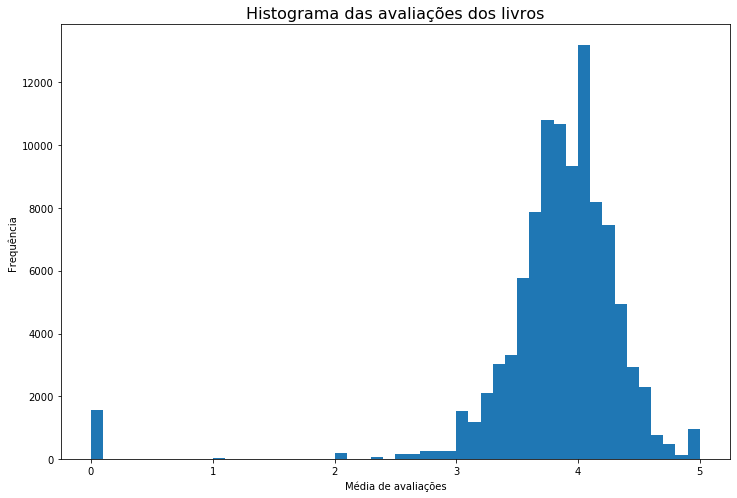

In [17]:
plt.figure(figsize=(12,8))
plt.hist(livros['rating'], density=False, bins=50)
plt.ylabel('Frequência')
plt.xlabel('Média de avaliações')
plt.title('Histograma das avaliações dos livros', fontsize=16)
plt.show()

Nota-se que as notas estão mais concentradas em valores mais altos, especialmente entre 3 e 5. 

A partir dessa observação, podemos analisar o comportamento específico dessas médias em diferentes categorias de interesse, como o "formato" do livro (`bookformat`), isto é, se ele é de capa dura, brochura, ebook etc. Listando os formatos mais recorrentes e suas respectivas frequências:

In [18]:
livros4 = livros.groupby('bookformat').count()
livros4['title'].nlargest(30)

bookformat
Paperback                53855
Hardcover                27581
ebook                     5328
Kindle Edition            4569
Mass Market Paperback     3024
Unknown Binding            449
Nook                       395
Audio CD                   318
Board Book                 164
Spiral-bound               137
Audiobook                  105
Library Binding             69
Board book                  65
paperback                   38
Audio                       35
Trade Paperback             34
Audio Cassette              29
Leather Bound               29
Comics                      24
Cards                       22
Pamphlet                    18
hardback                    17
Boxed Set                   15
paper                       14
Taschenbuch                 13
Unbound                     13
Comic                       12
Novelty Book                11
Other Format                11
Audible Audio               10
Name: title, dtype: int64

Percebe-se que existem algumas categorias repetidas (por exemplo, "Board Book" e "Board book"), além de formatos que poderiam ser colocados em uma mesma categoria, como "ebook" e "Kinde Edition", e outros que não são exatamente livros ("Cards", "Pamphlet" etc.). Assim, seria relevante reorganizar essa base, juntando formatos iguais em mesmas categorias e não considerando formatos que não são o alvo da análise.

Dessa forma, listando todos os formatos presentes no dataset:

In [19]:
lista_formatos = []
for i in range (len(livros.bookformat)):
    if livros.bookformat[i] not in lista_formatos:
        lista_formatos.append(livros.bookformat[i])
print(lista_formatos)

['Hardcover', 'Paperback', nan, 'ebook', 'Audiobook', 'Mass Market Paperback', 'Kindle Edition', 'Textbook', 'Other Format', 'Board Book', 'Nook', 'Turtleback', 'Unknown Binding', 'Board book', 'Hardback', 'Audio CD', 'Audio', 'Spiral-bound', 'Boxed set', 'Boxed Set', 'Diary', 'Online Publication', 'Trade Paperback', 'Novelty Book', 'Audio Cassette', 'Unbound', 'Library Binding', 'Textbook Binding', 'Comic', 'DVD (NTSC)', 'Loose-Leaf', 'MP3 Book', 'Pamphlet', 'Slipcased Hardcover', 'Double book softcover', 'Comics', 'Spiral', "paper, saddle-stapled 'zine", 'Broschiert', 'paper', 'Poche', 'MP3 CD', 'Flexibound', 'stitched', 'Free Online Fiction', 'Game', 'Cards', 'BrochÃ©', 'BÃ¬a má»\x81m', 'Deck of 78 Tarot Cards', 'mass_market', 'Plastic Comb', 'Pasta dura', 'Mass Market', 'æ–‡åº«', 'NOOKstudy eTextbook', 'hardcover', 'Ringbound', 'cassettes', 'Perfect Paperback', 'Livejournal posting', 'Audio Play', 'NOOKmagazine (eMagazine)', 'DVD', 'English scanlation', 'cloth', 'Capa dura', 'Paper

Recategorizando esses livros em categorias de maior interesse com base nos formatos mais recorrentes e inserindo a informação em uma nova coluna chamada `formatos`:

In [20]:
capa_dura = ['hardcover', 'hardback', 'hardbound', 'capa dura', 'hard cover', 'hardcover ', 'cloth hardcover', \
             'hardcover in dust jacket', 'slipcased hardcover', 'mini-hardcover', 'hardbound, with dust jacket']
brochura = ['double book softcover','paperback', 'brochure', 'capa comum', 'softcover', 'brochura', 'soft cover', \
            'brossura', 'capa mole']
ebook = ['ebook', 'nook','kindle', 'kindle ebook', 'kindle edition', 'pdf']
online = ['wattpad', 'online fiction', 'online publication', 'online edition', 'webpage', 'online', 'free online read']
encadernacao_biblioteca = ['library binding', 'library']
audiobook = ['audiobook', 'audio', 'audio cd', 'mp3 book', 'audiocd']
box = ['boxed collection', 'boxed set', 'kit', 'boxed set - hardcover']
bolso = ['mass market paperback', 'mass market', 'pocket', 'taschenbuch']
papelao = ['boardbook', 'board book', 'board books', 'board']
espiral = ['spiral', 'spiral-bound', 'spiral=bound']
didatico = ['textbook', 'nook study etextbook', 'nook study etextbook', 'textbook binding']
hq = ['comic', 'comicbook', 'online comic', 'comic book', 'webcomic', 'online comic - webcomic']

dicio_formatos = {'Capa Dura': capa_dura, 'Brochura': brochura, 'eBook': ebook, 'Online': online, \
                  'Encadernação \nde biblioteca': encadernacao_biblioteca, 'Audiobook': audiobook, 'Box': box,\
                  'Bolso': bolso, 'Papelão': papelao, 'Espiral': espiral, 'Didático': didatico, 'HQ': hq}

for i in range (0, len(livros.bookformat)): 
    for j in range (0, len(dicio_formatos)):
        if str(livros['bookformat'][i]).lower() in list(dicio_formatos.values())[j]:
            livros.loc[i, 'formato'] = list(dicio_formatos.keys())[j]

Note que nem todos os _bookformats_ foram recategorizados. Ainda assim, ao listar as frequências, percebe-se que relativamente poucos livros não foram recategorizados (apenas cerca de 4.000 dentre os 100.000 contidos no dataset).

In [21]:
livros_por_formato = livros.groupby('formato').count()
livros_por_formato['title']

formato
Audiobook                         468
Bolso                            3046
Box                                20
Brochura                        53916
Capa Dura                       27628
Didático                            8
Encadernação \nde biblioteca       71
Espiral                           144
HQ                                 23
Online                             28
Papelão                           234
eBook                           10295
Name: title, dtype: int64

Preparando agora esses novos valores para serem plotados em um boxplot:

In [22]:
mediana_formatos = pd.DataFrame(livros.groupby('formato').median())
ordem_boxplot = mediana_formatos.sort_values(by="rating", ascending= False)

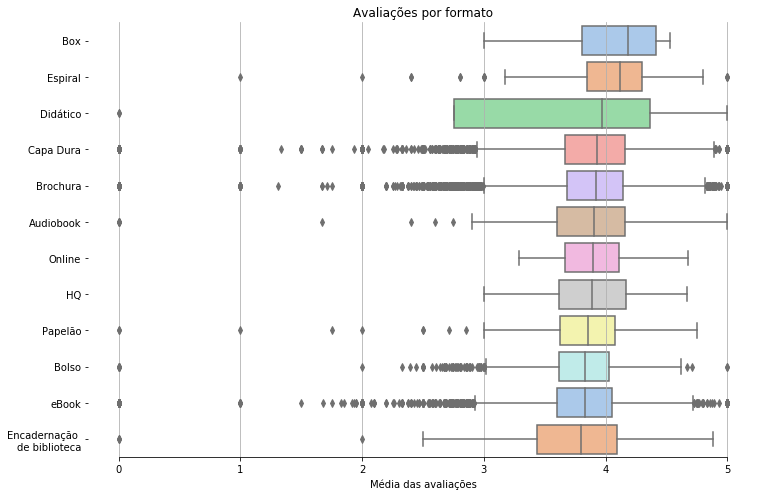

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y="formato", 
            x="rating", 
            data=livros, 
            ax=ax,
            order=ordem_boxplot.index.values.tolist(),
            palette='pastel')
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel="Média das avaliações", title = "Avaliações por formato")
sns.despine(trim=True, left=True)

Analisando o gráfico acima, nota-se que as distribuições das notas são bem parecidas entre as diferentes categorias, concentrando-se em notas mais altas, de modo bem semelhante ao que ocorreu no histograma geral da média de avalições. Também se faz perceptível a presença de muitos _outliers_, em especial para as categorias mais frequentes na base (brochura, capa dura, ebook, bolso...), o que parece indicar que não há uma relação muito forte entre o formato do livro e como ele é avaliado pelos leitores. 

Do gráfico acima, ainda se destaca a categoria de livros didáticos, cujas médias de avaliações aparentam estar mais "espalhadas". Contudo, essa diferença de distribuição pode estar relacionada com o fato de existirem apenas 8 itens com esse formato na tabela (uma quantidade quase insignificante em comparação ao total de 100.000).

Text(16.425000000000004, 0.5, 'Média das avaliações')

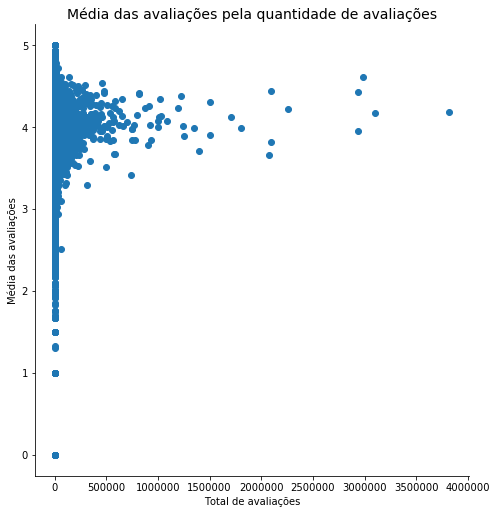

In [25]:
sns.FacetGrid(livros, height=7).map(plt.scatter, "totalratings", "rating")
plt.title ("Média das avaliações pela quantidade de avaliações", fontsize=14)
plt.xlabel ("Total de avaliações")
plt.ylabel ("Média das avaliações")